In [1]:
from pandas import read_csv

from matplotlib.pyplot import subplots

from numpy import arange, linspace, zeros


In [2]:
df = read_csv("data/EEG_background.txt", delim_whitespace=True) 

df.head()


,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,...,Pz,A1,A2,EKG,ATM,EO1,EO2,EM1,EM2,PHO
0,-7.4546,22.8428,6.28159,15.6212,7.98755,22.4034,-7.7884,32.6146,35.6545,24.8028,...,-11.775,38.8505,35.2711,2.35162,14.1170,13.6331,13.7021,12.9109,13.7034,9.37573
1,-11.1060,21.4828,6.89088,15.0562,10.10910,22.5443,-7.1574,34.1495,34.8749,29.5059,...,-12.350,44.9804,61.4472,1.89293,14.2920,13.7184,13.7942,13.0194,13.7628,9.44731
2,-14.4000,20.0907,7.94856,14.1624,13.00190,21.6666,-6.1377,34.6890,34.1256,33.6971,...,-13.006,46.2484,79.1628,1.22726,14.4623,13.7995,13.8982,13.1116,13.8239,9.51796
3,-17.2380,18.7206,9.36857,13.0093,16.52820,19.9170,-4.6946,34.2955,33.6028,37.5240,...,-13.580,43.3831,88.4718,0.30236,14.6182,13.8759,14.0155,13.1927,13.8914,9.58770
4,-19.5540,17.4084,11.06040,11.6674,20.51280,17.4778,-2.7760,33.1315,33.5562,41.1388,...,-13.886,36.7796,89.8117,-0.85890,14.7537,13.9521,14.1399,13.2692,13.9652,9.65654


In [3]:
df.shape

(2373, 28)

# Numpy Plot

Time in the rows, sensors in the columns

In [4]:
sr = 256          # Sampling rate: 1 / seconds

duration = 5      # seconds

df_np = df.to_numpy()

data = df_np[:duration*sr, :19]

data.shape

(1280, 19)

In [5]:
def plot_series(data, sr):
    '''
    Time series plot of multiple time series
    Data are normalised to mean=0 and var=1 
    
    data: nxm numpy array. Rows are time points, columns are channels
    sr: sampling rate, same time units as period
    '''
    from numpy import flip
    
    samples = data.shape[0]
    sensors = data.shape[1]
    
    period = samples // sr

    time = linspace(0, period, period*sr)

    offset = 5 # for mean=0 and var=1 normalised data

    # Calculate means and standard deviations of all columns
    means = data.mean(axis=0)
    stds = data.std(axis=0)

    # Plot each series with an offset of 2 times the standard deviations
    fig, ax = subplots(figsize=(7, 8))

    ax.plot(time, (data - means)/stds + offset*arange(sensors-1,-1,-1));

    ax.plot(time, zeros((samples, sensors)) + offset*arange(sensors-1,-1,-1),'--',color='gray');
    
    ax.set(xlabel='Time')
    ax.set_yticks(offset*arange(sensors))
    ax.set_yticklabels(flip(arange(sensors)+1))


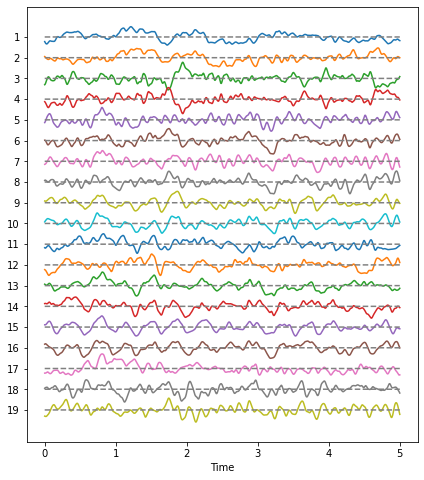

In [6]:
plot_series(data, sr);


# How to create a function

In [31]:
def my_plot1(data):
    
    fig, ax = subplots()
        
    ax.plot(data)


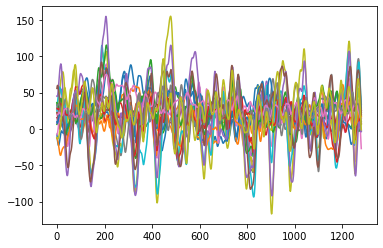

In [32]:
my_plot1(data)

In [35]:
def my_plot2(data, factor):
    '''
    this is just a test
    '''
    
    columns = data.shape[1]
    
    offset = arange(columns)
    
    fig, ax = subplots()
        
    ax.plot(data + offset*factor)


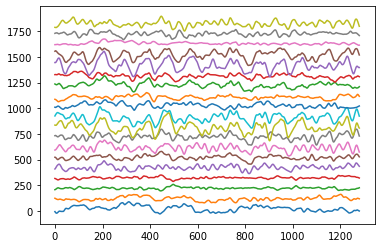

In [38]:
my_plot2(data, 100)